In [1]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\muham\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/muhammadjauzi93/DSUB2.0/main/all-data.csv',encoding='ISO-8859-1')

In [4]:
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [5]:
df.columns = ["Sentiment","News Headline"]

In [6]:
df.head()

,Sentiment,News Headline
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      4845 non-null   object
 1   News Headline  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

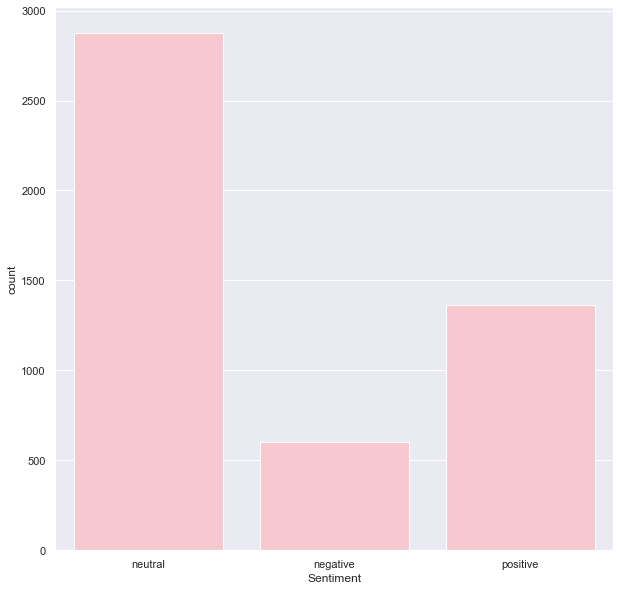

In [8]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(data=df, x='Sentiment', color='pink')

In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [11]:
def wordcloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show() 

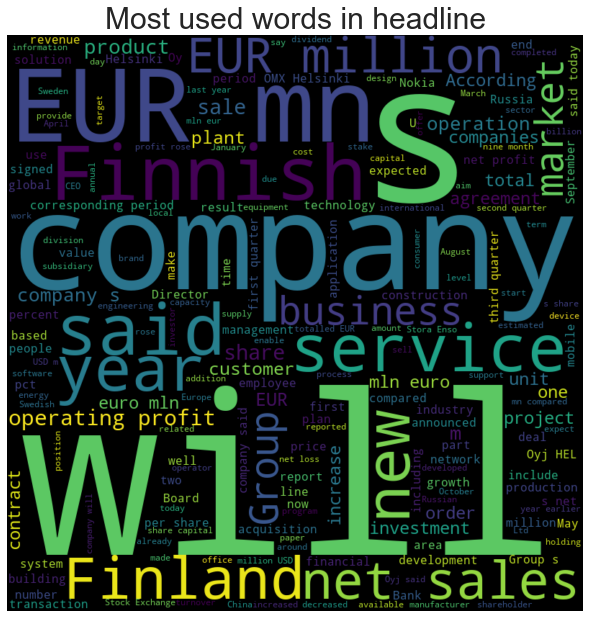

In [19]:
wordcloud_generator(df['News Headline'], title="Most used words in headline")

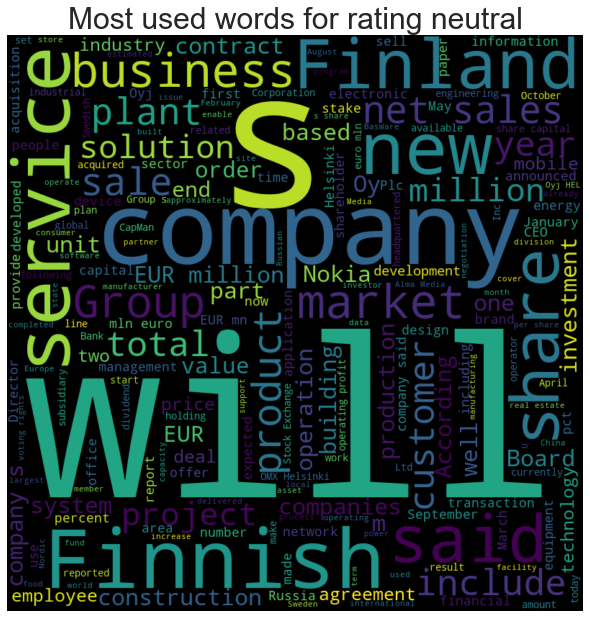

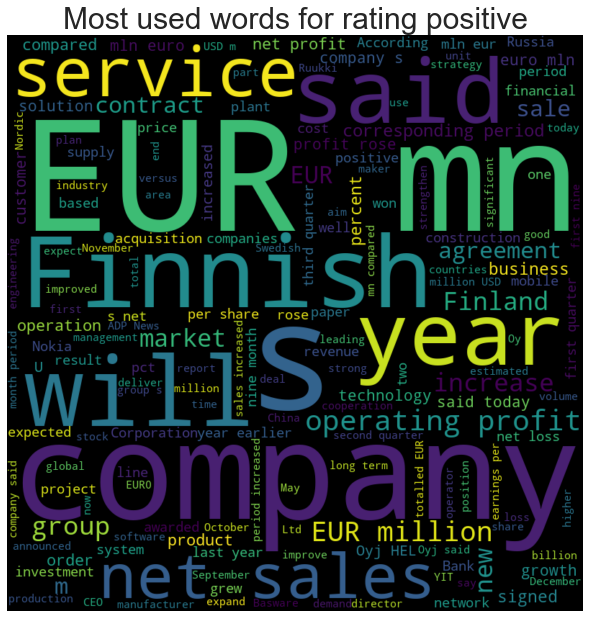

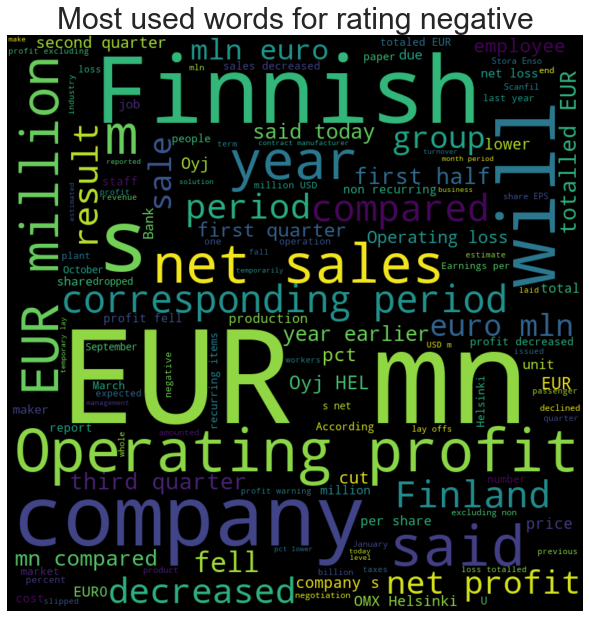

In [21]:
rating = ['neutral','positive','negative']

for x in rating:
    reviews = df[df['Sentiment'] == x]
    wordcloud_generator(reviews['News Headline'], title="Most used words for rating " + x)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
feature = tfidf.fit_transform(df['News Headline'])

In [13]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + 'Hello World !' + color.END)

Hello World !


In [14]:
query = ["warning","problem","Finnish","profit","investment"]

for x in query:
    queryTFIDF = tfidf.transform([x])
    cosims = cosine_similarity(queryTFIDF, feature).flatten()
    results = cosims.argsort()[:-6:-1]

    print(color.BOLD + f'Query = {x}\n'+ color.END)

    for r in results:
        print(df.iloc[r]['Sentiment'])
        print(df.iloc[r]['News Headline'])
        print("---------------------------")
    
    print("\n")

Query = warning

negative
Scanfil has also issued a profit warning .
---------------------------
negative
Finnish media group Talentum has issued a profit warning .
---------------------------
negative
Scanfil issued a profit warning on 10 April 2006 .
---------------------------
negative
Finnish Bank of +_land +_landsbanken has issued a profit warning .
---------------------------
negative
Finnish forest machinery manufacturer Ponsse has issued a profit warning .
---------------------------


Query = problem

neutral
Another problem is cola-flavoured long drinks .
---------------------------
negative
At the moment , Valio is not worried , but if the ban continues for long , it may become quite a problem .
---------------------------
positive
The company 's advantage in pricing can be seen in the significantly lower prices offered by the new unmanned stations .
---------------------------
neutral
The change in holdings in accordance with Chapter 2 , Section 9 of the Finnish Securities 

In [15]:
analyzer = SentimentIntensityAnalyzer()

In [16]:
sentiments = [analyzer.polarity_scores(review)['compound'] for review in df['News Headline']]

In [17]:
df['Sentiments Score'] = sentiments

In [18]:
df.head()

,Sentiment,News Headline,Sentiments Score
0,neutral,Technopolis plans to develop in stages an area...,-0.2960
1,negative,The international electronic industry company ...,0.0000
2,positive,With the new production plant the company woul...,0.8555
3,positive,According to the company 's updated strategy f...,0.6705
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,0.3485


In [22]:
pd.set_option('display.max_colwidth',None)
#df[(df["Sentiment"] == 'negative') & (df["Sentiments Score"] > 0)].sort_values('Sentiments Score', ascending=False)[0:20]
df[(df["Sentiments Score"] > 0)].sort_values('Sentiments Score', ascending=False)[0:10]

,Sentiment,News Headline,Sentiments Score
4477,positive,"Tieto was looking for an energy solution which would best support the idea of sustainable development , and we were happy to be able to provide such a solution , saysJouni Haikarainen , Vice President , Fortum .",0.9460
4458,positive,"efficiency improvement measures 20 January 2010 - Finnish stationery and gift retailer Tiimari HEL : TII1V said today that it will continue to improve its operational efficiency , by focusing on its profitable core operations .",0.9403
4471,positive,"The long-standing partnership and commitment enable both parties to develop their respective operations , and ESL Shipping will also have the opportunity to update its fleet and improve its efficiency .",0.9360
4811,neutral,"Because expenditures must be justified to pass budget approval hurdles , we believe our RoP model can help make it easier for IT and IT security practitioners to make the business case for acquiring enabling security technologies and related control activities .",0.9337
1955,neutral,"`` Each year , personal entertainment plays a more significant role in determining whether a fitness facility 's workout experience is pleasurable or a chore , '' said Brian Wilson , director of marketing for Precor 's Entertainment & Services Division .",0.9216
4462,positive,"The restructuring creates a more efficient organization with increased operational focus and stable profitability , and leads to more efficient production , said Bo Annvik , head of Specialty Stainless .",0.9133
1718,neutral,I thank Jarmo Ukonaho warmly for his contribution and wish him all the best in the future challenges . '',0.9081
1816,neutral,"The company 's objective is to offer the best people flow experience by developing and delivering solutions that enable people to move smoothly , safely , comfortably and without waiting in buildings in an increasingly urbanizing environment .",0.8979
1162,neutral,Aldata to Share Space Optimization Vision at Apollo User Group and 2009 Category Management Association Conferences ; Company Will Unveil New Solution that Combines Business Intelligence with Space Planning Data at Conferences,0.8807
1904,positive,"Luxembourg-registered investment fund Amber Trust II has won the final approval of Lithuania 's Competition Council to acquire 29.6 percent of Sanitas , the country 's largest pharmaceutical producer .",0.8779


In [23]:
pd.set_option('display.max_colwidth',None)
#df[(df["Sentiment"] == 'positive') & (df["Sentiments Score"] < 0)].sort_values('Sentiments Score')[0:20]
df[(df["Sentiments Score"] < 0)].sort_values('Sentiments Score')[0:10]

,Sentiment,News Headline,Sentiments Score
4801,neutral,"The manager is critical of politicians ' failure to differentiate between beleaguered European financial institutions and Skandinavian banks , `` which sailed through the crisis without issues '' .",-0.8658
735,negative,"At the moment , Valio is not worried , but if the ban continues for long , it may become quite a problem .",-0.8572
2990,neutral,"Jeder Beta-Tester erh+Ælt kostenlos sechs Monate lang Updates und hat laut eigener Aussage die M+¦glichkeit , die finale Version zu beeinflussen .",-0.8316
4420,negative,Relations with the City have been further damaged by comments from Mr Ashley criticising City investors and analysts as `` cry babies '' .,-0.8271
1954,neutral,"Swedish telco TeliaSonera is teaming up with Friends , a Swedish organization against bullying , to fight bullying of children and teenagers via electronic channels .",-0.8074
4296,negative,"`` There 's the issue of thieves stealing them from building sites , '' said Mr Smith .",-0.7906
2258,neutral,- Moody 's said it gave P A1 long-term senior unsecured and P P-1 short-term debt ratings to Finnish lender Aktia Bank 's EUR1bn USD1 .4 bn euro medium-term note EMTN program of 25 March 2011 .,-0.7650
4840,negative,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .,-0.7269
4332,negative,"Paper companies were in negative territories , with Stora Enso R shedding 1.62 pct to 12.73 eur , UPM-Kymmene down 0.80 pct at 18.64 eur and M-real B 0.18 pct lower at 5.57 eur .",-0.7096
4793,neutral,The hull of the vessel was built one block at a time and Ruukki delivered the plate material for each block as construction progressed .,-0.7003
